In [1]:
# What is the chance of survival ?
# Naive Bayes classification applied to the Titanic dataset

# ideas gleaned from: https://www.youtube.com/watch?v=PPeaRc-r1OI&ab_channel=codebasics
# Lots of examples collected: https://github.com/BindiChen/machine-learning#scikit-learn-and-general-machine-learning

import numpy
import pandas

In [16]:
# The Titanic dataset: https://www.kaggle.com/datasets/hesh97/titanicdataset-traincsv?select=train.csv
source = 'https://raw.githubusercontent.com/realtechsupport/CriticalMachineLearning/main/various_datasets/titanic_train.csv'

# Load data as a dataframe
dataframe = pandas.read_csv(source, sep = ',')
# Show first 5 rows
dataframe.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Show dimensions
dataframe.shape

(891, 12)

In [17]:
# Simplify the dataframe - you have to make some assumptions - they could be wrong...
# Drop columns you believe are irrelevant for your model of surviving the Titanic disaster
dataframe.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Cabin', 'Ticket', 'Embarked'], axis='columns', inplace=True)
dataframe.head()


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [18]:
# Define target and dependent variables in two separate entities
target = dataframe.Survived
inputs = dataframe.drop('Survived', axis = 'columns')

In [19]:
# The BIG assumption we are making here is that the inputs (Pclass, gender, age, fare) are all
# Independent, meaning they change indepdently of the other variables.
# Is that true, or is fare maybe related to age and Pclass?
# How could you select up a different set of dependent variables

In [20]:
# We will use a version of one-hot encoding to represent gender
# N possible values for a categorical variable, will necessitate N columns for representation
# Male and female are mapped to two columns
# Convert gender to a boolean using the pandas functionality "get_dummies"
dummies = pandas.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [21]:
# Append the boolean representation of gender to the existing inputs
# Also drop the gender column as it is no longer needed
inputs = pandas.concat([inputs, dummies], axis='columns')
inputs.drop('Sex', axis = 'columns', inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0


In [22]:
# Check the dataset for any missing data
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [23]:
# Now find those AGE NaN values
inputs[inputs.isna().any(axis=1)]

,Pclass,Age,Fare,female,male
5,3,NaN,8.4583,0,1
17,2,NaN,13.0000,0,1
19,3,NaN,7.2250,1,0
26,3,NaN,7.2250,0,1
28,3,NaN,7.8792,1,0
...,...,...,...,...,...
859,3,NaN,7.2292,0,1
863,3,NaN,69.5500,1,0
868,3,NaN,9.5000,0,1
878,3,NaN,7.8958,0,1


In [24]:
# That is alot of missing values.
# Here is a trick - fill in the values with imaginary numbers
# Take the average age as a guess
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head(10)

#Can you imagine a better way to do this?

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1
6,1,54.000000,51.8625,0,1
7,3,2.000000,21.0750,0,1
8,3,27.000000,11.1333,1,0
9,2,14.000000,30.0708,1,0


Basic steps of data preparation: training versus testing sets image source:

https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

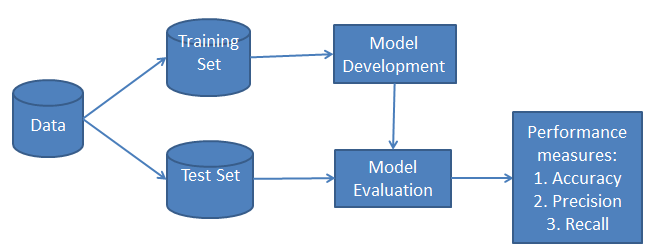

In [25]:
# OK, now we have a mathematically complete dataset, albeit one that makes some really strong assumptions...
# We can create training and testing sets on the data now.
# Check out the sklearn library
# https://scikit-learn.org/stable/

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2)

In [26]:
# Check the training and test sets
print(len(X_train))
print(len(X_test))
X_train[0:5]

712
179


,Pclass,Age,Fare,female,male
156,3,16.000000,7.7333,1,0
448,3,5.000000,19.2583,1,0
887,1,19.000000,30.0000,1,0
773,3,29.699118,7.2250,0,1
204,3,18.000000,8.0500,0,1


In [27]:
X_test[0:5]

,Pclass,Age,Fare,female,male
432,2,42.000000,26.0000,1,0
507,1,29.699118,26.5500,0,1
351,1,29.699118,35.0000,0,1
703,3,25.000000,7.7417,0,1
798,3,30.000000,7.2292,0,1


In [28]:
# Create the Naive Bayes Model, and use a Gaussian distribution
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [29]:
# Train the model on the training data
model.fit(X_train, y_train)

GaussianNB()

In [30]:
# How good is the performance on the test set?
model.score(X_test, y_test)

0.7877094972067039

In [31]:
# That meas about 77% accuracy with a 80 / 20 train test data split
# Now you can use the trained model to predict how one of the test cases would be evaluated
# In other words, if they would survive, based on the model

# Lets try the first 5 cases
model.predict(X_test[:5])


array([1, 0, 0, 0, 0])

In [ ]:
# 1 means survive, 0 means die
# Compare to the ground truth data, y_test
y_test[:5]

338    1
329    1
485    0
781    1
76     0
Name: Survived, dtype: int64

In [ ]:
# Ah ha, we have several false predictions
# If we retrain the network with more data, and use less for testing,
# We might get better results...

In [32]:
# We can use label encoder to translate the 0/1 back to text
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["survived", "died"])
list(le.inverse_transform(y_test[:5]))

['survived', 'survived', 'died', 'died', 'died']

In [33]:
# If you want the probabilities of survival (instead of a live/die result),
# use the predict_proba() function
model.predict_proba(X_test[:5])

array([[0.03139787, 0.96860213],
       [0.91251393, 0.08748607],
       [0.90305128, 0.09694872],
       [0.98943623, 0.01056377],
       [0.99018084, 0.00981916]])

In [ ]:
# The first number is the probability of dying, the second the probability of survival, based on the current model

In [34]:
# Now you can try with some imagined data
# features of an imagined passenger

import warnings
warnings.filterwarnings("ignore")

pclass = 2
age = 15
fare = 1000
female = 0
male = 1
imagined = [pclass, age, fare, female, male]
a_imagined = numpy.array(imagined)

prediction_imagined_passenger = model.predict([a_imagined])
list(le.inverse_transform(prediction_imagined_passenger))

['survived']